# Import Modules
You may need to install some of them.

  7.153312 seconds (49.13 M allocations: 5.463 GiB, 9.52% gc time)


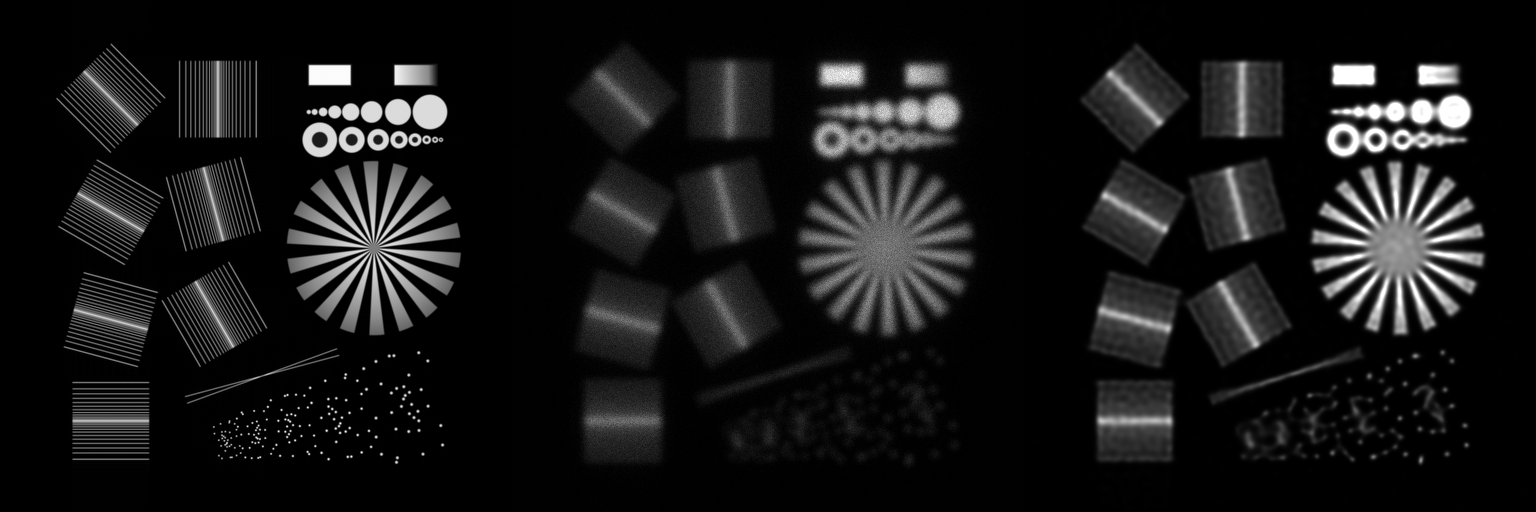

In [4]:
using Revise # for development useful
using DeconvOptim, TestImages, Images, FFTW, Noise

# load test image
img = channelview(testimage("resolution_test_512"))

# generate simple Point Spread Function of aperture radius 30
psf = generate_psf(size(img), 30)

# create a blurred, noisy version of that image
img_b = conv_psf(img, psf)
img_n = poisson(img_b, 300)

# deconvolve 2D with default options
@time res, o = deconvolution(img_n, psf)

# show final results next to original and blurred version
colorview(Gray, [img img_n res])